# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [58]:
# ===== Twoja implementacja tutaj =====
def f1(x):
    return np.sign(x)*x+x**2
def f2(x):
    return np.sign(x)*x**2
def f3(x):
    return np.abs(np.sin(5*x))**3

def f4_1(x):
    return 1/(1+x**2)
def f4_25(x):
    return 1/(1+(25*x)**2)
def f4_100(x):
    return 1/(1+(100*x)**2)
def f5(x):
    return np.sign(x)



---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


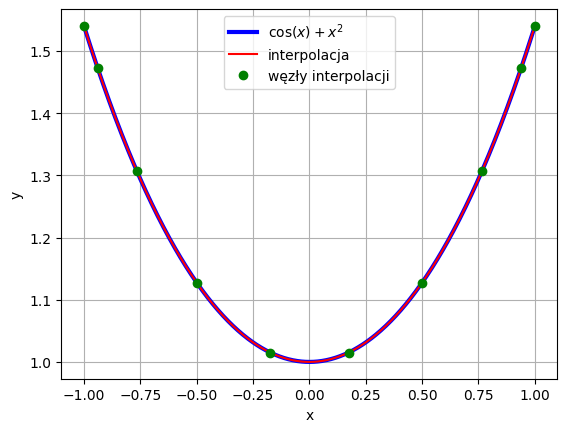

In [3]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

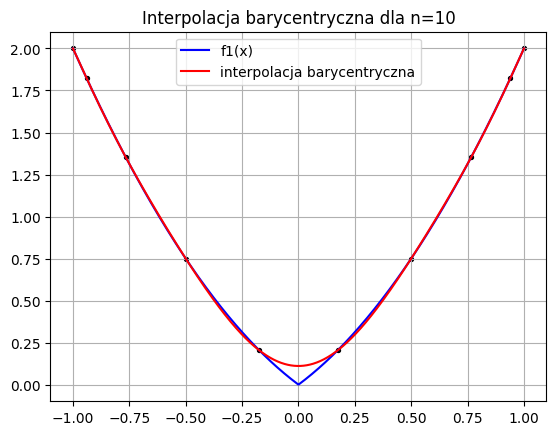

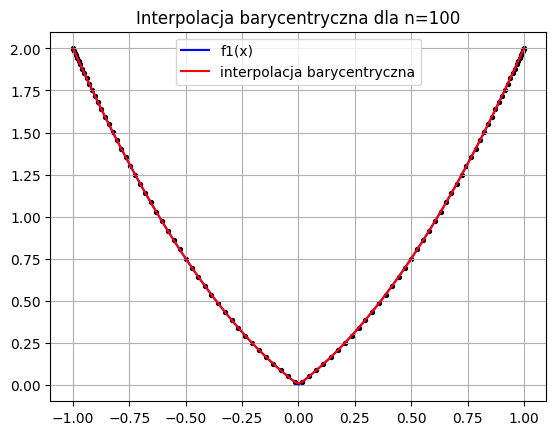

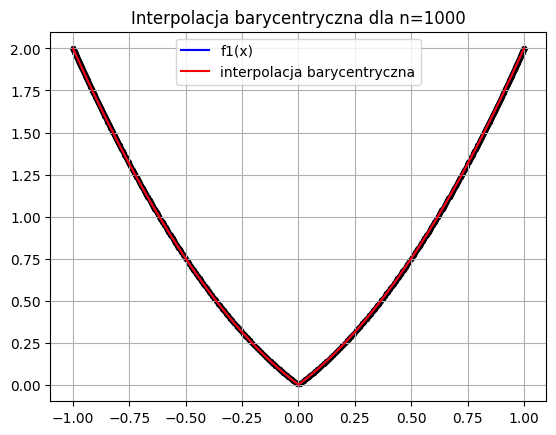

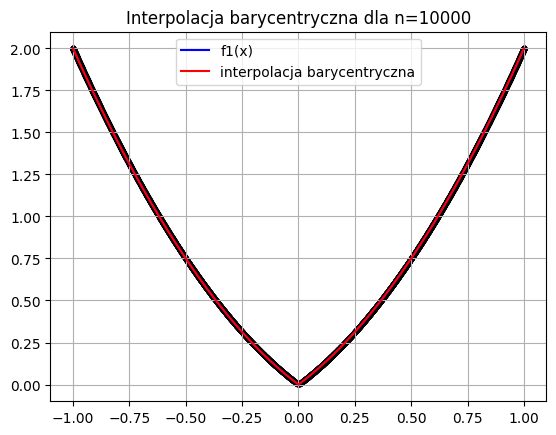

n=10:   L_inf error = 1.101123e-01,   our time=0.0273s,  scipy time=0.0006s
n=100.0:   L_inf error = 9.124054e-03,   our time=0.1539s,  scipy time=0.0027s
n=1000.0:   L_inf error = 2.380828e-04,   our time=1.5485s,  scipy time=0.0292s
n=10000.0:   L_inf error = 1.853345e-06,   our time=14.6015s,  scipy time=0.7069s


In [41]:
# ===== Twoja implementacja tutaj =====
import timeit

#ns = [10, 10e1, 10e2, 10e3, 10e4]
ns=[10,10e1,10e2,10e3]  # mniejsze n dla szybszego testu
errors = []
times_moje = []
times_scipy = []

x = np.linspace(-1, 1, 1000)

for n in ns:
    n=int(n)

    xi = main.chebyshev_nodes(n)
    yi = f1(xi)
    wi = main.bar_cheb_weights(n)



    y_moje = main.barycentric_inte(xi, yi, wi, x)

    times_moje.append(timeit.timeit(lambda :main.barycentric_inte(xi, yi, wi, x),number=1))



    y_scipy = sp.interpolate.barycentric_interpolate(xi, yi, x)


    times_scipy.append(timeit.timeit(lambda :sp.interpolate.barycentric_interpolate(xi, yi, x),number=1))

    errors.append(np.max(np.abs(f1(x) - y_moje)))


    plt.figure()
    plt.plot(x, f1(x), 'b', label='f1(x)')
    plt.plot(x, y_moje, 'r', label='interpolacja barycentryczna')
    plt.scatter(xi, yi, s=8, color='k')
    plt.title(f'Interpolacja barycentryczna dla n={n}')
    plt.grid()
    plt.legend()
    plt.show()


for i, n in enumerate(ns):
    print(f"n={n}:   L_inf error = {errors[i]:.6e},   our time={times_moje[i]:.4f}s,  scipy time={times_scipy[i]:.4f}s")



---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

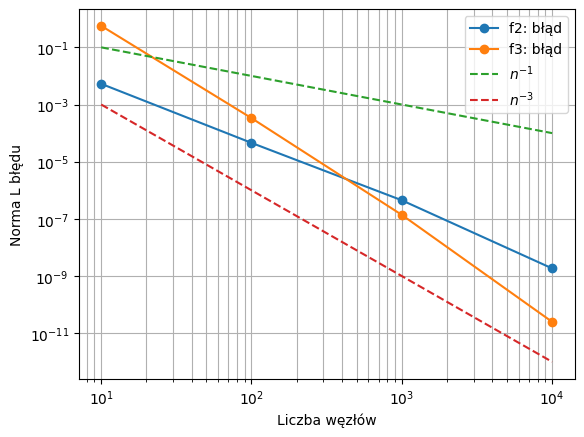

In [59]:

x = np.linspace(-1, 1, 1000)
vals2 = f2(x)
vals3 = f3(x)

ns = [10, 10e1, 10e2, 10e3]

err2 = []
err3 = []

for n in ns:
    k = int(n)

    xn = main.chebyshev_nodes(k)
    wn = main.bar_cheb_weights(k)

    interp2 = main.barycentric_inte(xn, f2(xn), wn, x)
    interp3 = main.barycentric_inte(xn, f3(xn), wn, x)

    err2.append(main.L_inf(vals2, interp2))
    err3.append(main.L_inf(vals3, interp3))

orders = np.array(ns)

plt.loglog(orders, err2, 'o-', label='f2: błąd')
plt.loglog(orders, err3, 'o-', label='f3: błąd')

plt.loglog(orders, orders**(-1), '--', label='$n^{-1}$')
plt.loglog(orders, orders**(-3), '--', label='$n^{-3}$')

plt.xlabel("Liczba węzłów")
plt.ylabel("Norma L błędu")
plt.grid(True, which='both')
plt.legend()
plt.show()


---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

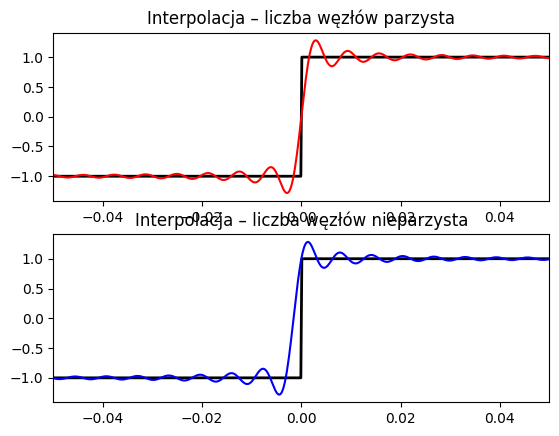

Błąd L_inf (nieparzyste n): 1.9542698631539668
Błąd L_inf (parzyste n):    0.9258009247712057


In [62]:
x = np.linspace(-0.1, 0.1, 1000)

n_even = 1000
nodes_even = main.chebyshev_nodes(n_even)
vals_even = f5(nodes_even)
weights_even = main.bar_cheb_weights(n_even)
interp_even = main.barycentric_inte(nodes_even, vals_even, weights_even, x)

n_odd = 999
nodes_odd = main.chebyshev_nodes(n_odd)
vals_odd = f5(nodes_odd)
weights_odd = main.bar_cheb_weights(n_odd)
interp_odd = main.barycentric_inte(nodes_odd, vals_odd, weights_odd, x)


plt.subplot(2,1,1)
plt.plot(x, f5(x), 'k', linewidth=2)
plt.plot(x, interp_even, 'r')
plt.title("Interpolacja – liczba węzłów parzysta")
plt.xlim(-0.05, 0.05)

plt.subplot(2,1,2)
plt.plot(x, f5(x), 'k', linewidth=2)
plt.plot(x, interp_odd, 'b')
plt.title("Interpolacja – liczba węzłów nieparzysta")
plt.xlim(-0.05, 0.05)

plt.show()

print("Błąd L_inf (nieparzyste n):", main.L_inf(f5(x), interp_odd))
print("Błąd L_inf (parzyste n):   ", main.L_inf(f5(x), interp_even))


Różnią się one, ponieważ dla parzystego n zostanie wygenerowany taki węzeł że x=0, dla n nieparzystego nie zostanie wygenerowany taki węzeł. Ze względu na to, że punkt nieciągłości tej funkcji znajduje się właśnie w punkcie o x=0 wzięcie tego punktu charakterystycznego pod uwagę sprawia, że lepiej zostanie odwzorowana funkcja. Poprawia to odwzrorowanie po obu stronach tego punktu. Jeżeli nie weźmie się pod uwagę tego punktu, nie wiadomo jak wygląda zmiana wartości funkcji w tym otoczeniu.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)